<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9C.%D0%91.%D0%A1./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # Импорт библиотеки NumPy и присвоение ей псевдонима np
from numpy.linalg import norm  # Импорт функции norm из подмодуля linalg библиотеки NumPy
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для построения графиков и присвоение ей псевдонима plt
%matplotlib inline
# Настройка отображения графиков

In [ ]:
Rx_r = 10  # Задание радиуса Rx_r равным 10
lambda0_block = 0.2  # Задание длины волны в блоке lambda0_block равной 0.2
lambda0_I = 0.3  # Задание длины волны в области I lambda0_I равной 0.3
areaTotal = np.pi * Rx_r**2  # Вычисление общей площади круга areaTotal с радиусом Rx_r
circle_radius = 0.3  # Задание радиуса круга circle_radius равным 0.3

angl_phi = np.pi / 3  # Задание угла angl_phi равным π/3 радиан
ang_dist = 1  # Задание расстояния ang_dist равным 1

Power = 1  # Задание мощности Power равной 1


In [ ]:
def G(phi):
    # Определяем функцию G, которая принимает угол phi (в радианах)
    return 2 / (1 - np.cos(phi / 2))
    # Возвращаем коэффициент усиления антенны,
    # который зависит от угла phi. Используется косинус угла phi/2.

def PRx(power, Rx_Ii_d, phi):
    # Определяем функцию PRx, которая принимает мощность сигнала,
    # расстояние до приемника и угол phi.

    return power * G(phi) / (4 * np.pi * Rx_Ii_d**2)
    # Вычисляем интенсивность сигнала на приемнике:
    # Умножаем мощность сигнала на коэффициент усиления G(phi)
    # и делим на площадь сферы радиусом Rx_Ii_d (4 * π * r^2).
    # Возвращаем полученное значение интенсивности сигнала на приемнике.


In [ ]:
def plot_circle(x, y, r):
    # Определяем функцию plot_circle, которая принимает координаты центра круга (x, y) и его радиус r.

    angels = np.linspace(0, 2 * np.pi, 50)
    # Создаем массив из 50 значений углов от 0 до 2π (360 градусов),
    # чтобы получить точки по окружности круга.

    cirX = x + r * np.cos(angels)
    # Вычисляем координаты X точек на окружности круга,
    # используя радиус r и косинус углов (angels).

    cirY = y + r * np.sin(angels)
    # Вычисляем координаты Y точек на окружности круга,
    # используя радиус r и синус углов (angels).


In [ ]:
def plot_angl(x1, y1, rand_angl, draw=True, ret=False):
    # Определяем функцию plot_angl, которая принимает координаты (x1, y1) точки,
    # случайный угол rand_angl, флаг draw для рисования и флаг ret для возврата координат.

    x2 = x1 + ang_dist * np.cos(rand_angl)
    # Вычисляем координаты x2, используя случайный угол rand_angl и расстояние ang_dist.

    y2 = y1 + ang_dist * np.sin(rand_angl)
    # Вычисляем координаты y2, используя случайный угол rand_angl и расстояние ang_dist.

    x3 = x1 + ang_dist * np.cos(rand_angl + angl_phi)
    # Вычисляем координаты x3, добавляя угол angl_phi к rand_angl,
    # чтобы получить вторую точку на основе того же расстояния ang_dist.

    y3 = y1 + ang_dist * np.sin(rand_angl + angl_phi)
    # Вычисляем координаты y3, добавляя угол angl_phi к rand_angl,
    # чтобы получить вторую точку на основе того же расстояния ang_dist.

    if draw:  # Проверяем, нужно ли рисовать линии.
        plt.plot([x1, x2], [y1, y2], "--m")
        # Рисуем пунктирную линию от точки (x1, y1) до (x2, y2) цветом "м" (магента).

        plt.plot([x1, x3], [y1, y3], "--m")
        # Рисуем пунктирную линию от точки (x1, y1) до (x3, y3) цветом "м" (магента).

        if ret:  # Проверяем, нужно ли возвращать координаты.
            return (x2, y2), (x3, y3)
            # Если ret=True, возвращаем координаты (x2, y2) и (x3, y3).
    else:
        return (x2, y2), (x3, y3)
        # Если draw=False, просто возвращаем координаты (x2, y2) и (x3, y3) без рисования.


In [ ]:
def cart2pol(x, y):
    # Определяем функцию cart2pol, которая преобразует декартовы координаты (x, y) в полярные координаты (rho, phi).

    rho = np.sqrt(x**2 + y**2)
    # Вычисляем радиус (rho) как расстояние от точки (x, y) до начала координат (0, 0)
    # с использованием теоремы Пифагора.

    phi = np.arctan2(y, x)
    # Вычисляем угол (phi) в радианах, используя функцию arctan2,
    # которая возвращает угол между положительной осью x и линией, соединяющей (0, 0) и (x, y).

    return (rho, phi)
    # Возвращаем радиус (rho) и угол (phi) как кортеж.

def pol2cart(rho, phi):
    # Определяем функцию pol2cart, которая преобразует полярные координаты (rho, phi) в декартовы координаты (x, y).

    x = rho * np.cos(phi)
    # Вычисляем координату x, используя радиус (rho) и косинус угла (phi).

    y = rho * np.sin(phi)
    # Вычисляем координату y, используя радиус (rho) и синус угла (phi).

    return (x, y)
    # Возвращаем декартовы координаты (x, y) как кортеж.


In [ ]:
def poisson_circle_points(l, area, r):
    # Определяем функцию poisson_circle_points, которая генерирует точки в круге
    # с использованием распределения Пуассона.
    # Параметры:
    # l - средняя плотность точек на единицу площади
    # area - площадь круга, в котором генерируются точки
    # r - радиус круга

    numbPoints = np.random.poisson(l * area)
    # Генерируем количество точек (numbPoints) с использованием распределения Пуассона,
    # где l * area - это среднее количество точек, ожидаемое в заданной площади.

    phi = 2 * np.pi * np.random.uniform(0, 1, numbPoints)
    # Генерируем случайные углы (phi) для полярных координат, равномерно распределенные
    # от 0 до 2π.

    rho = r * np.sqrt(np.random.uniform(0, 1, numbPoints))
    # Генерируем радиусы (rho) для полярных координат. Мы используем
    # sqrt для того, чтобы обеспечить равномерное распределение точек внутри круга.
    # Умножаем на радиус r, чтобы точки находились внутри круга радиуса r.

    X, Y = pol2cart(rho, phi)
    # Преобразуем полярные координаты (rho, phi) в декартовы координаты (X, Y)
    # с помощью ранее определенной функции pol2cart.

    return X, Y
    # Возвращаем массивы X и Y, содержащие координаты сгенерированных точек.

In [ ]:
def check_dist(a, b, c):
    # Определяем функцию check_dist, которая вычисляет расстояние от точки c до линии,
    # заданной двумя точками a и b.
    # Параметры:
    # a, b - точки, определяющие линию
    # c - точка, расстояние до которой нужно проверить

    # Нормализуем векторы (c-a), (b-a), (c-b), (a-b) для получения единичных векторов
    ca = (c - a) / np.linalg.norm(c - a)  # Направление от a до c
    ba = (b - a) / np.linalg.norm(b - a)  # Направление от a до b
    cb = (c - b) / np.linalg.norm(c - b)  # Направление от b до c
    ab = (a - b) / np.linalg.norm(a - b)  # Направление от b до a

    # Проверяем, находится ли точка c на стороне от линии ab
    if np.arccos(np.dot(ca, ba)) > 1:
        # Если угол между векторами ca и ba больше 1 радиана,
        # то точка c находится за пределами отрезка ab
        return np.linalg.norm(c - a)  # Возвращаем расстояние от c до a

    if np.arccos(np.dot(cb, ab)) > 1:
        # Если угол между векторами cb и ab больше 1 радиана,
        # то точка c находится за пределами отрезка ab
        return np.linalg.norm(c - b)  # Возвращаем расстояние от c до b

    # Если точка c находится между a и b, вычисляем расстояние от c до линии ab
    return np.linalg.norm(np.cross(a - b, a - c)) / np.linalg.norm(b - a)
    # Используем векторное произведение для вычисления расстояния от точки c до линии ab.


In [ ]:
def iscrossing(x_c: dict, y_c: dict, dot1: [tuple, dict], dot2: [tuple, dict]) -> bool:
    '''
    Проверяет, пересекает ли линия, заданная точками dot1 и dot2,
    какие-либо блокирующие круги, центры которых определены в x_c и y_c.

    Параметры:
    x_c: dict - координаты x центров блокирующих кругов
    y_c: dict - координаты y центров блокирующих кругов
    dot1: [tuple, dict] - первая точка линии (может быть кортежем или словарем)
    dot2: [tuple, dict] - вторая точка линии (может быть кортежем или словарем)

    Возвращает:
    bool - True, если линия блокируется (пересекает круг), иначе False.
    '''

    for i in range(len(x_c)):
        # Проходим по всем центрам блокирующих кругов
        # x_c и y_c должны быть одинаковой длины, чтобы соответствовать центрам кругов
        # Преобразуем текущие координаты центра круга в массив NumPy
        center = np.array([x_c[i], y_c[i]])

        # Проверяем, пересекает ли линия между dot1 и dot2 круг с центром center
        if np.round(check_dist(np.array(dot1), np.array(dot2), center), 1) <= circle_radius:
            # Если расстояние от линии до центра круга меньше или равно радиусу круга,
            # значит линия блокируется
            return True  # Линия блокируется

    return False  # Линия не блокируется


In [ ]:
def cart2pol(x, y):
    """
    Преобразует декартовы координаты в полярные.

    Параметры:
    x: float - координата x
    y: float - координата y

    Возвращает:
    tuple - (r, theta), где r - радиус, theta - угол в радианах
    """
    r = np.sqrt(x**2 + y**2)  # Вычисляем радиус
    theta = np.arctan2(y, x)   # Вычисляем угол с использованием arctan2 для правильного определения угла
    return r, theta

def check_visibility(dm: [tuple, dict], dfv: [tuple, dict], dsv: [tuple, dict]) -> bool:
    '''
    Проверяет, видна ли точка dfv из точки dm,
    учитывая наличие точки dsv.

    Параметры:
    dm: [tuple, dict] - координаты наблюдателя (может быть кортежем или словарем)
    dfv: [tuple, dict] - координаты видимой точки (может быть кортежем или словарем)
    dsv: [tuple, dict] - координаты точки, которая может блокировать видимость (может быть кортежем или словарем)

    Возвращает:
    bool - True, если точка видима, иначе False.
    '''

    # Вычисляем углы между точками в полярных координатах
    rad1 = cart2pol(dfv[0] - dm[0], dfv[1] - dm[1])[1]  # Угол к точке dfv
    rad2 = cart2pol(0 - dm[0], 0 - dm[1])[1]            # Угол к началу координат
    rad3 = cart2pol(dsv[0] - dm[0], dsv[1] - dm[1])[1]  # Угол к точке dsv

    # Приводим углы к диапазону [0, 2π)
    r1 = rad1 if rad1 >= 0 else rad1 + np.pi * 2
    g1 = rad2 if rad2 >= 0 else rad2 + np.pi * 2
    b1 = rad3 if rad3 >= 0 else rad3 + np.pi * 2

    # Проверяем, находится ли угол g1 между углами r1 и b1
    if g1 > r1 and g1 < b1:
        return True  # Точка видима
    else:
        return False  # Точка не видима

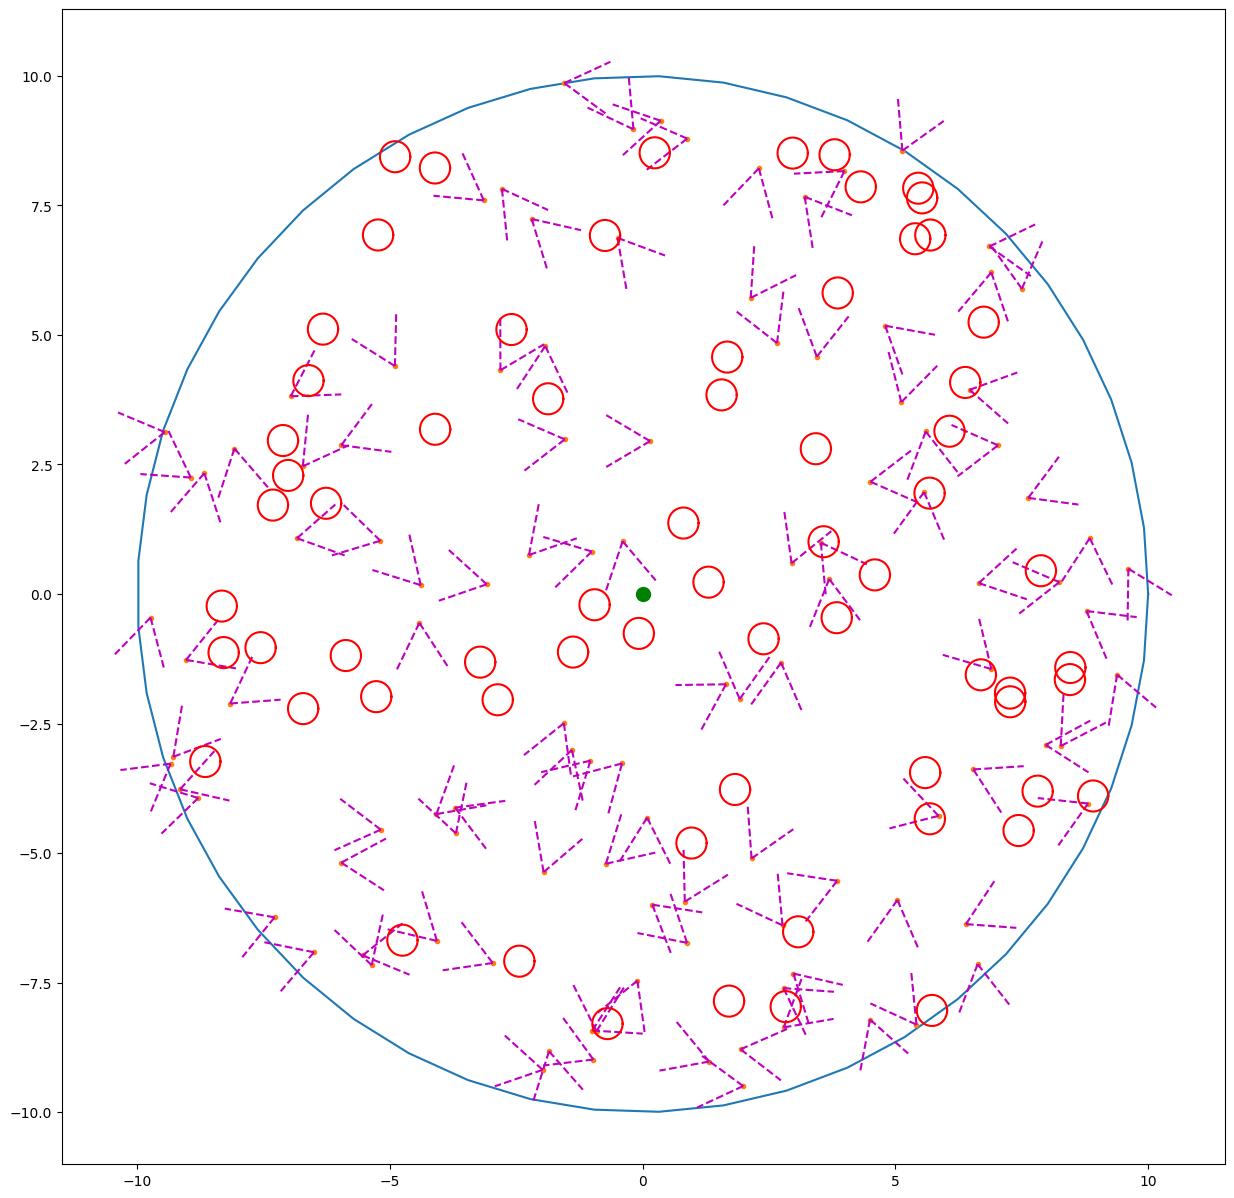

In [ ]:
# Генерируем точки внутри круга с заданной плотностью и площадью
X_I, Y_I = poisson_circle_points(lambda0_I, areaTotal, Rx_r)
X_c, Y_c = poisson_circle_points(lambda0_block, areaTotal, Rx_r)

# Создаем фигуру для графика
plt.figure(figsize=(15, 15))

# Создаем массив углов для отрисовки круга
angels = np.linspace(0, 2 * np.pi, 50)
# Вычисляем координаты круга
cirX = Rx_r * np.cos(angels)
cirY = Rx_r * np.sin(angels)

# Отрисовываем круг
plt.plot(cirX, cirY)

# Отрисовываем точки, сгенерированные внутри круга
plt.plot(X_I, Y_I, ".")

# Списки для хранения точек
Dots_F = []  # Список для первой точки
Dots_S = []  # Список для второй точки

# Генерируем угол для каждой точки и вычисляем соответствующие точки
for i, j in zip(X_I, Y_I):
    dot1, dot2 = plot_angl(i, j, np.random.uniform(0, 2 * np.pi), ret=True)
    Dots_F.append(dot1)  # Добавляем первую точку в список
    Dots_S.append(dot2)  # Добавляем вторую точку в список

# Отрисовываем точку в центре координат
plt.plot(0, 0, '.g', markersize=20)  # Центр с зеленым маркером

# Отрисовываем блокирующие круги
for i in range(len(X_c)):
    plot_circle(X_c[i], Y_c[i], circle_radius)  # Отрисовываем каждый блокирующий круг


In [ ]:
cnt = 0  # Инициализируем счетчик для объектов, которые заблокированы

# Проходим по всем сгенерированным точкам внутри круга
for xi, yi in zip(X_I, Y_I):
    dot_i = (xi, yi)  # Создаем кортеж для текущей точки

    # Проверяем, пересекает ли линия от текущей точки до центра (0, 0) блокирующие круги
    if iscrossing(X_c, Y_c, dot_i, (0, 0)):
        cnt += 1  # Если пересечение есть, увеличиваем счетчик

# Выводим количество заблокированных объектов и общее количество объектов
print("{} obj IS blocked out of {}".format(cnt, len(X_I)))


84 obj IS blocked out of 112


In [ ]:
cnt = 0  # Инициализируем счетчик для объектов, которые могут видеть модтейджер

# Проходим по всем сгенерированным точкам, а также по соответствующим точкам dot1 и dot2
for xi, yi, dot1, dot2 in zip(X_I, Y_I, Dots_F, Dots_S):
    dot_main = (xi, yi)  # Создаем кортеж для текущей точки

    # Проверяем видимость между основной точкой и двумя дополнительными точками
    if check_visibility(dot_main, dot1, dot2):
        cnt += 1  # Если видимость есть, увеличиваем счетчик

# Выводим количество объектов, которые могут видеть приемник, и общее количество объектов
print("{} obg can see modtager out of {}".format(cnt, len(X_I)))


13 obg can see modtager out of 112


In [ ]:
cnt = 0  # Инициализируем счетчик для объектов, которые могут видеть модтейджер и не заблокированы

# Проходим по всем сгенерированным точкам, а также по соответствующим точкам dot1 и dot2
for xi, yi, dot1, dot2 in zip(X_I, Y_I, Dots_F, Dots_S):
    dot_main = (xi, yi)  # Создаем кортеж для текущей точки

    # Проверяем, что точка не заблокирована и может видеть две дополнительные точки
    if not iscrossing(X_c, Y_c, dot_main, (0, 0)) and check_visibility(dot_main, dot1, dot2):
        cnt += 1  # Если оба условия выполнены, увеличиваем счетчик

# Выводим количество объектов, которые могут видеть приемник и не заблокированы, и общее количество объектов
print("{} obg CAN see modtager AND NOT blocked out of {}".format(cnt, len(X_I)))


4 obg CAN see modtager AND NOT blocked out of 112


In [ ]:
Rx_r = 10  # Радиус области, в которой распределены точки
lambda0_block = 0.2  # Интенсивность распределения для блокирующих объектов
lambda0_I = 0.3  # Интенсивность распределения для физических объектов
areaTotal = np.pi * Rx_r**2  # Общая площадь области
circle_radius = 0.3  # Радиус блока
angl_phi = np.pi / 3  # Угол видимости
ang_dist = 1  # Расстояние между точками (не используется в этом коде)
Power = 1  # Мощность источника

# Генерируем список углов от 0 до pi
phi_list = np.linspace(.01, np.pi-.01, 10)  # Значения углов (0, pi)
N = 100  # Количество моделей

Imean = []  # Список для хранения средних значений интенсивности
CNT_list = []  # Список для хранения среднего количества видимых объектов

# Основной цикл по углам
for p in phi_list:
    I_list = []  # Список для хранения интенсивности для текущего угла
    models_cnt = []  # Список для хранения количества видимых объектов для текущего угла
    for _ in range(N):  # Цикл по количеству моделей
        # Создание точек для блокирующих объектов и физических объектов
        X_I, Y_I = poisson_circle_points(lambda0_I, areaTotal, Rx_r)
        X_c, Y_c = poisson_circle_points(lambda0_block, areaTotal, Rx_r)


        Dots_F = []  # Список для одной границы угла видимости
        Dots_S = []  # Список для другой границы угла видимости
        for i, j in zip(X_I, Y_I):  # Проходим по всем физическим объектам
            dot1, dot2 = plot_angl(i, j, p, ret=True, draw=False)  # Получаем границы угла видимости
            Dots_F.append(dot1)  # Добавляем первую границу
            Dots_S.append(dot2)  # Добавляем вторую границу


        I_cnt = 0  # Счетчик интенсивности
        CNT = 0  # Счетчик видимых объектов
        for xi, yi, dot1, dot2 in zip(X_I, Y_I, Dots_F, Dots_S):
            dot_main = (xi, yi)  # Текущая точка
            # Проверяем, не заблокирована ли точка и видима ли она
            if not iscrossing(X_c, Y_c, dot_main, (0, 0)) and check_visibility(dot_main, dot1, dot2):
                CNT += 1  # Увеличиваем счетчик видимых объектов
                # Считаем расстояние от источника до объекта
                distance = np.sqrt((xi)**2 + (yi)**2)
                # Применяем формулу для вычисления интенсивности
                I_cnt += PRx(Power, distance, angl_phi)

        I_list.append(I_cnt)  # Добавляем интенсивность в список
        models_cnt.append(CNT)  # Добавляем количество видимых объектов в список
    Imean.append(np.mean(I_list))  # Вычисляем среднее значение интенсивности и добавляем его в список Imean
    CNT_list.append(np.mean(models_cnt))

Text(0, 0.5, 'I mean')

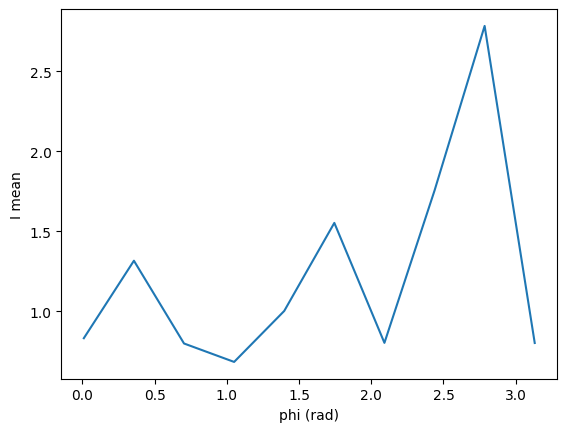

In [ ]:
plt.plot(phi_list, Imean)  # Строит график, откладывая значения углов (phi_list) по оси X и средние значения интенсивности (Imean) по оси Y.
plt.xlabel("phi (rad)")  # Добавляет подпись к оси X, указывая, что она представляет углы в радианах (phi).
plt.ylabel("I mean")  # Добавляет подпись к оси Y, указывая, что она представляет средние значения интенсивности (I mean).

In [ ]:
Rx_r = 10  # Радиус области, в которой будут размещены объекты (в данном случае 10 единиц).
lambda0_block = 0.2  # Параметр лямбда для объектов блокировки.
lambda0_I = 0.3  # Параметр лямбда для физических объектов.
areaTotal = np.pi * Rx_r**2  # Общая площадь круга, в котором будут размещены объекты (площадь круга).
circle_radius = 0.3  # Радиус круга для других расчетов (например, для визуализации).
angl_phi = np.pi / 3  # Угол видимости (в радианах).
ang_dist = 1  # Расстояние для каких-либо расчетов (не используется в данном коде).
Power = 1  # Мощность источника (может использоваться в расчетах интенсивности).

lambda_I = np.linspace(.01, .5, 10)  # Создает массив значений лямбда для объектов I, равномерно распределенных от 0.01 до 0.5.
N = 100  # Количество моделей, которые будут созданы для каждого значения лямбда.

Imean = []  # Список для хранения средних значений интенсивности для каждого значения лямбда.
CNT_list = []  # Список для хранения средних значений счетчиков объектов для каждого значения лямбда.

for lll in lambda_I:  # Цикл по каждому значению лямбда.
    I_list = []  # Список для хранения интенсивности для каждой модели.
    models_cnt = []  # Список для хранения счетчиков объектов для каждой модели.

    for _ in range(N):  # Цикл по количеству моделей.
        # Генерация точек для объектов блокировки и физических объектов с использованием пуассоновского распределения.
        X_I, Y_I = poisson_circle_points(lll, areaTotal, Rx_r)  # Координаты объектов I.
        X_c, Y_c = poisson_circle_points(lambda0_block, areaTotal, Rx_r)  # Координаты объектов блокировки.

        # Создание векторов для угла видимости.
        Dots_F = []  # Список для хранения точек на границе видимости.
        Dots_S = []  # Список для хранения точек на линии, которая определяет границу видимости.

        for i, j in zip(X_I, Y_I):  # Цикл по каждой точке объекта I.
            dot1, dot2 = plot_angl(i, j, angl_phi, ret=True, draw=False)  # Вычисление точек на границе видимости.
            Dots_F.append(dot1)  # Добавление первой точки в список границы видимости.
            Dots_S.append(dot2)  # Добавление второй точки в список границы видимости.

        # Проверка видимости объектов.
        I_cnt = 0  # Счетчик интенсивности для текущей модели.
        CNT = 0  # Счетчик видимых объектов для текущей модели.

        for xi, yi, dot1, dot2 in zip(X_I, Y_I, Dots_F, Dots_S):  # Цикл по всем объектам I и их границам видимости.
            dot_main = (xi, yi)  # Основная точка объекта I.
            # Проверка, не пересекает ли основная точка линию блокировки и находится ли она в пределах видимости.
            if not iscrossing(X_c, Y_c, dot_main, (0, 0)) and check_visibility(dot_main, dot1, dot2):
                # Увеличение счетчика видимых объектов.
                CNT += 1
                # Подсчет расстояния от источника до объекта.
                distance = np.sqrt((xi)**2 + (yi)**2)
                # Применение формулы для расчета интенсивности в зависимости от расстояния и других параметров.
                I_cnt += PRx(Power, distance, angl_phi)

        I_list.append(I_cnt)  # Добавление интенсивности текущей модели в список.
        models_cnt.append(CNT)  # Добавление счетчика объектов текущей модели в список.

    Imean.append(np.mean(I_list))  # Вычисление и добавление среднего значения интенсивности для текущего лямбда в список.
    CNT_list.append(np.mean(models_cnt))  # Вычисление и добавление среднего значения счетчиков объектов для текущего лямбда в список.


Text(0, 0.5, 'I mean')

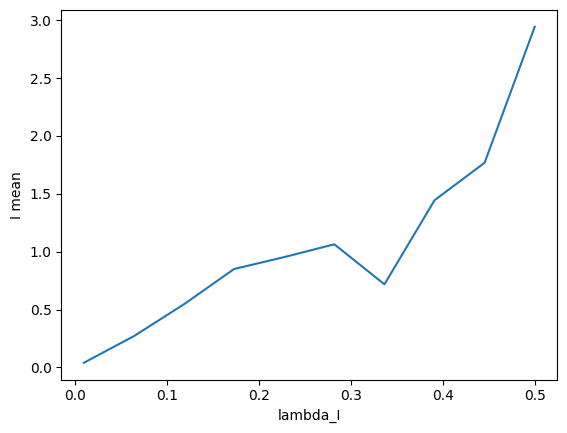

In [ ]:
plt.plot(lambda_I, Imean)  # Построение графика, где по оси X откладываются значения lambda_I, а по оси Y - соответствующие средние значения интенсивности (Imean).
plt.xlabel("lambda_I")  # Установка метки для оси X с текстом "lambda_I".
plt.ylabel("I mean")  # Установка метки для оси Y с текстом "I mean".

In [ ]:
Rx_r = 10  # Радиус области, в которой будут размещены объекты (в данном случае 10 единиц).
lambda0_block = 0.2  # Параметр лямбда для пуассоновского распределения объектов блокировки.
lambda0_I = 0.3  # Параметр лямбда для пуассоновского распределения физических объектов.
areaTotal = np.pi * Rx_r**2  # Общая площадь круга, в котором будут размещены объекты (площадь круга).
circle_radius = 0.3  # Радиус круга для других расчетов (например, для визуализации).
angl_phi = np.pi / 3  # Угол видимости (в радианах).
ang_dist = 1  # Расстояние для каких-либо расчетов (не используется в данном коде).
Power = 1  # Мощность источника (может использоваться в расчетах интенсивности).

lambda_block = np.linspace(.01, .5, 10)  # Создание массива значений лямбда для объектов блокировки, равномерно распределенных от 0.01 до 0.5.
N = 100  # Количество моделей, которые будут созданы для каждого значения лямбда.

Imean = []  # Список для хранения средних значений интенсивности для каждого значения лямбда блокировки.
CNT_list = []  # Список для хранения средних значений счетчиков видимых объектов для каждого значения лямбда блокировки.

for lll in lambda_block:  # Цикл по каждому значению лямбда для объектов блокировки.
    I_list = []  # Список для хранения интенсивности для каждой модели.
    models_cnt = []  # Список для хранения счетчиков видимых объектов для каждой модели.

    for _ in range(N):  # Цикл по количеству моделей.
        # Генерация координат для физических объектов I и объектов блокировки с использованием пуассоновского распределения.
        X_I, Y_I = poisson_circle_points(lambda0_I, areaTotal, Rx_r)  # Координаты физических объектов I.
        X_c, Y_c = poisson_circle_points(lll, areaTotal, Rx_r)  # Координаты объектов блокировки.

        # Создание списков для углов видимости.
        Dots_F = []  # Список для хранения точек на границе видимости.
        Dots_S = []  # Список для хранения точек, определяющих границу видимости.

        for i, j in zip(X_I, Y_I):  # Цикл по каждой точке объекта I.
            dot1, dot2 = plot_angl(i, j, angl_phi, ret=True, draw=False)  # Вычисление точек на границе видимости.
            Dots_F.append(dot1)  # Добавление первой точки в список границы видимости.
            Dots_S.append(dot2)  # Добавление второй точки в список границы видимости.

        # Проверка видимости объектов.
        I_cnt = 0  # Счетчик интенсивности для текущей модели.
        CNT = 0  # Счетчик видимых объектов для текущей модели.

        for xi, yi, dot1, dot2 in zip(X_I, Y_I, Dots_F, Dots_S):  # Цикл по всем объектам I и их границам видимости.
            dot_main = (xi, yi)  # Основная точка объекта I.
            # Проверка, не пересекает ли основная точка линию блокировки и находится ли она в пределах видимости.
            if not iscrossing(X_c, Y_c, dot_main, (0, 0)) and check_visibility(dot_main, dot1, dot2):
                # Увеличение счетчика видимых объектов.
                CNT += 1
                # Подсчет расстояния от источника до объекта.
                distance = np.sqrt((xi)**2 + (yi)**2)
                # Применение формулы для расчета интенсивности в зависимости от расстояния и других параметров.
                I_cnt += PRx(Power, distance, angl_phi)

        I_list.append(I_cnt)  # Добавление интенсивности текущей модели в список.
        models_cnt.append(CNT)  # Добавление счетчика видимых объектов текущей модели в список.

    Imean.append(np.mean(I_list))  # Вычисление и добавление среднего значения интенсивности для текущего лямбда в список.
    CNT_list.append(np.mean(models_cnt))  # Вычисление и добавление среднего значения счетчиков объектов для текущего лямбда в список.


Text(0, 0.5, 'I mean')

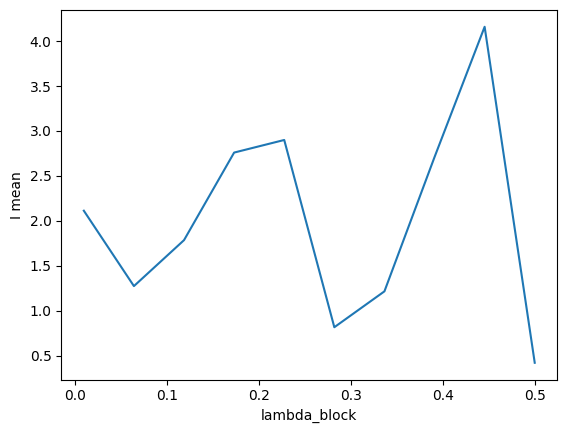

In [ ]:
plt.plot(lambda_block, Imean)  # Построение линейного графика, где значения lambda_block используются для оси X, а значения Imean для оси Y.
plt.xlabel("lambda_block")      # Установка подписи для оси X, указывая, что она представляет значения параметра lambda_block.
plt.ylabel("I mean")            # Установка подписи для оси Y, указывая, что она представляет средние значения интенсивности (I mean).

Text(0, 0.5, 'correct obj')

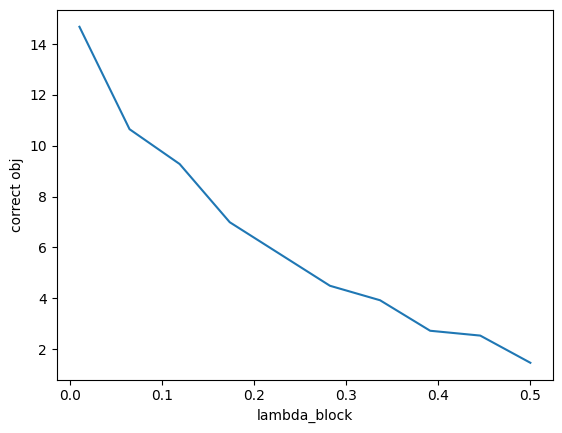

In [ ]:
plt.plot(lambda_block, CNT_list)  # Построение линейного графика, где значения lambda_block откладываются по оси X, а значения CNT_list (число правильных объектов) — по оси Y.
plt.xlabel("lambda_block")         # Установка подписи для оси X, указывая, что она представляет значения параметра lambda_block.
plt.ylabel("correct obj")          # Установка подписи для оси Y, указывая, что она представляет количество правильных объектов (correct obj).